# 🧪 Laboratorio 8
Integrantes
- Diego Alexander Hernández Silvestre - 21270
- Linda Inés Jiménez Vides - 21169
- Mario Antonio Guerra Morales - 21008
- Kristopher Javier Alvarado López - 21188

## 💻 Task 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
dataTrain = pd.read_csv('data/train.csv')
dataTrain

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [3]:
dataTrain.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [4]:
dataTrain['date'] = pd.to_datetime(dataTrain['date'])

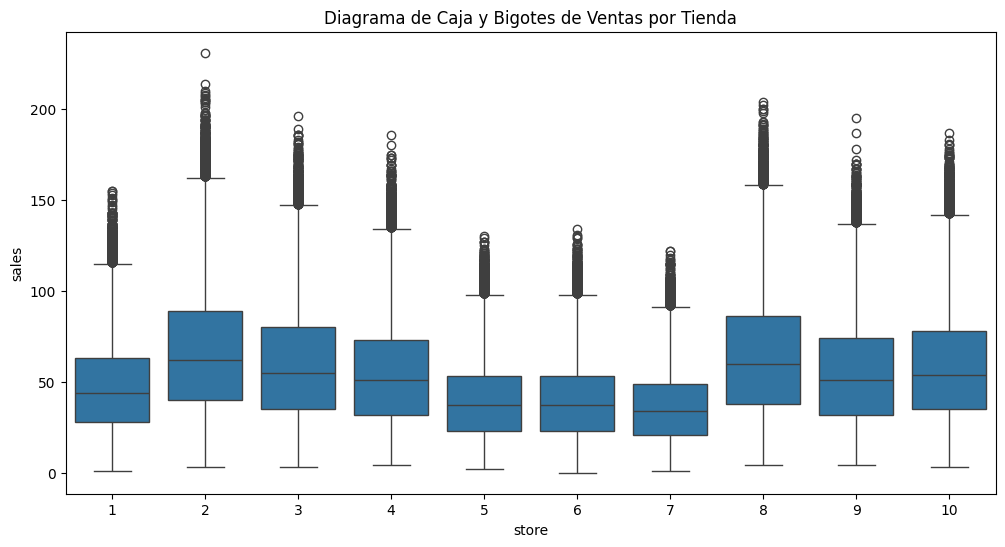

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='sales', data=dataTrain)
plt.title('Diagrama de Caja y Bigotes de Ventas por Tienda')
plt.show()

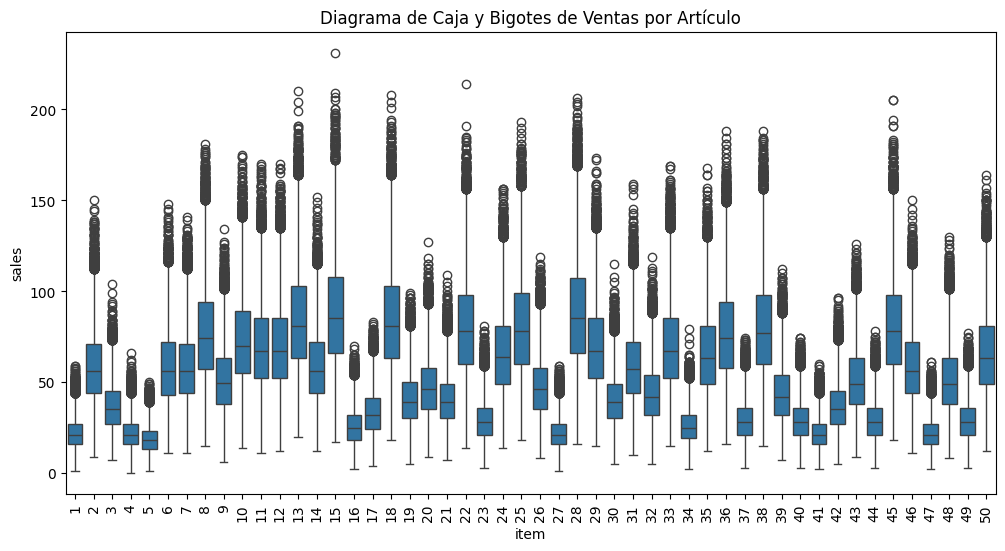

In [6]:
# Boxplot de las ventas ('sales') por artículo ('item')
plt.figure(figsize=(12, 6))
sns.boxplot(x='item', y='sales', data=dataTrain)
plt.title('Diagrama de Caja y Bigotes de Ventas por Artículo')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si hay muchos artículos
plt.show()

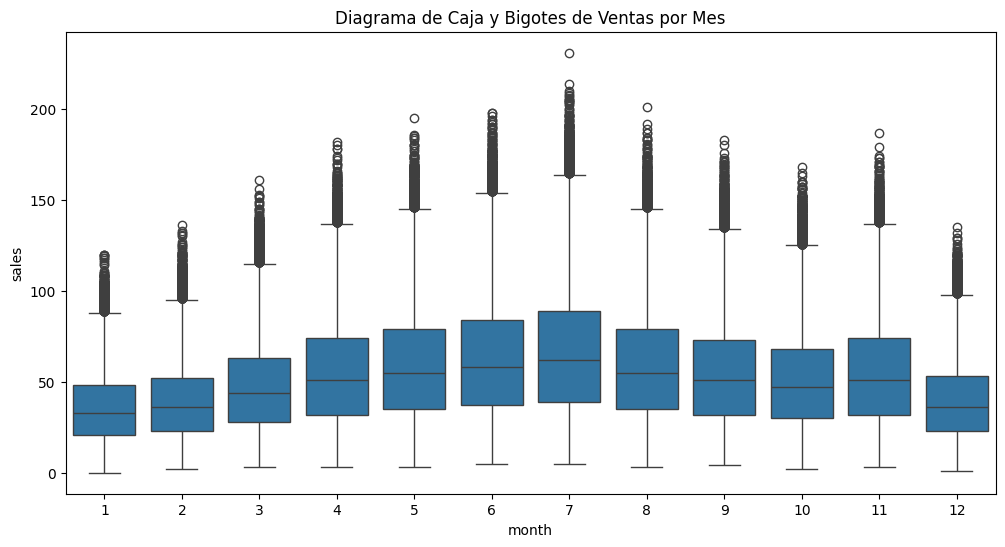

In [7]:
dataTrain['month'] = dataTrain['date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='sales', data=dataTrain)
plt.title('Diagrama de Caja y Bigotes de Ventas por Mes')
plt.show()

In [8]:
dataTrain.describe()

,date,store,item,sales,month
count,913000,913000.000000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287,6.523549
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000,1.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000,4.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000,7.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000,10.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000,12.000000
std,NaN,2.872283,14.430878,28.801144,3.448535


#### 🗑️ Eliminación de algunos valores atípicos

In [9]:
# Calcular el rango intercuartílico (IQR)
Q1 = dataTrain['sales'].quantile(0.25)
Q3 = dataTrain['sales'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

print(f"Límite superior: {upper_bound}")


Límite superior: 130.0


In [10]:
# Filtrar los datos eliminando solo los valores superiores al límite
dataTrain_filtered = dataTrain[dataTrain['sales'] <= upper_bound]

print(f"Filas originales: {len(dataTrain)}, Filas después de eliminar outliers superiores: {len(dataTrain_filtered)}")


Filas originales: 913000, Filas después de eliminar outliers superiores: 901033


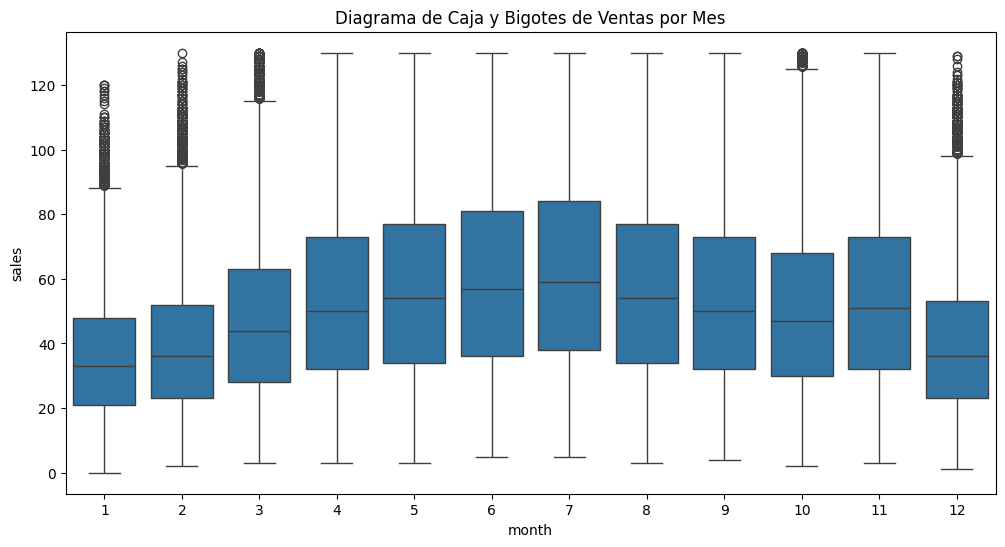

In [11]:
dataTrain['month'] = dataTrain['date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='sales', data=dataTrain_filtered)
plt.title('Diagrama de Caja y Bigotes de Ventas por Mes')
plt.show()

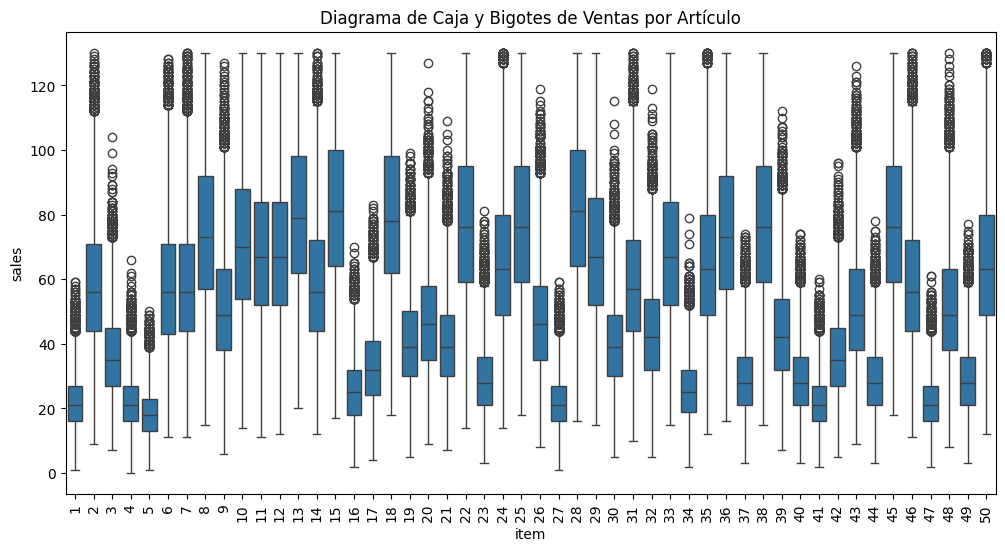

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='item', y='sales', data=dataTrain_filtered)
plt.title('Diagrama de Caja y Bigotes de Ventas por Artículo')
plt.xticks(rotation=90)
plt.show()

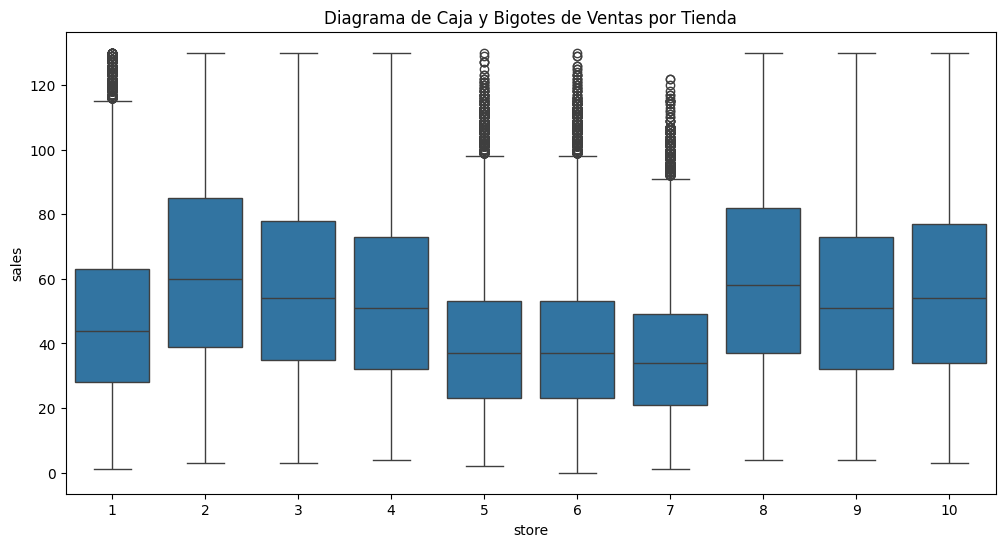

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='sales', data=dataTrain_filtered)
plt.title('Diagrama de Caja y Bigotes de Ventas por Tienda')
plt.show()

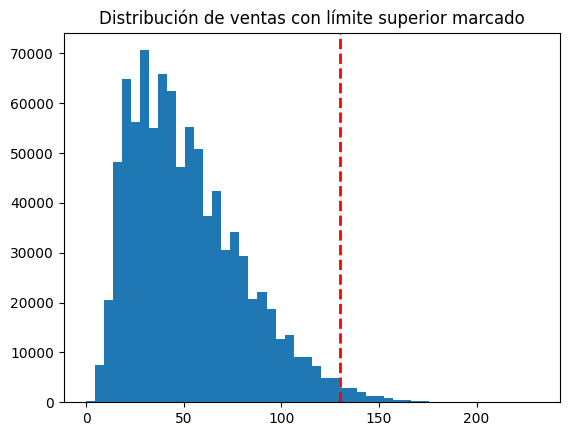

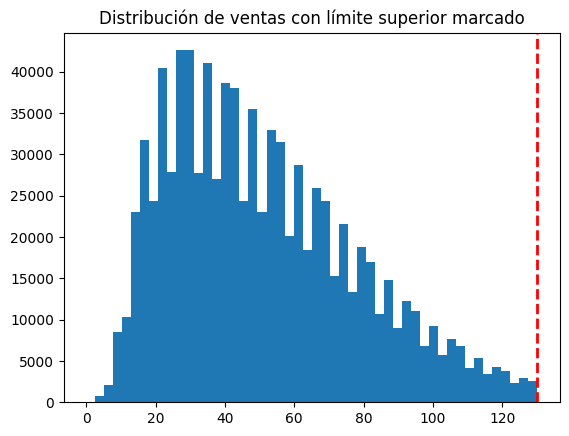

In [14]:
plt.hist(dataTrain['sales'], bins=50)
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución de ventas con límite superior marcado')
plt.show()

plt.hist(dataTrain_filtered['sales'], bins=50)
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución de ventas con límite superior marcado')
plt.show()


In [15]:
dataTrain_filtered.describe()

,date,store,item,sales,month
count,901033,901033.000000,901033.000000,901033.000000,901033.000000
mean,2015-06-27 11:01:56.558217216,5.503666,25.526636,51.032028,6.518636
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000,1.000000
25%,2014-03-27 00:00:00,3.000000,13.000000,29.000000,3.000000
50%,2015-06-25 00:00:00,6.000000,26.000000,46.000000,7.000000
75%,2016-09-26 00:00:00,8.000000,38.000000,68.000000,10.000000
max,2017-12-31 00:00:00,10.000000,50.000000,130.000000,12.000000
std,NaN,2.867474,14.470524,26.932926,3.465358


In [16]:
# Normalización de los datos
scaler = MinMaxScaler()
dataTrain_filtered['sales'] = scaler.fit_transform(dataTrain_filtered[['sales']])
dataTrain_filtered

C:\Users\Alvar\AppData\Local\Temp\ipykernel_31208\3084156816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTrain_filtered['sales'] = scaler.fit_transform(dataTrain_filtered[['sales']])


,date,store,item,sales,month
0,2013-01-01,1,1,0.100000,1
1,2013-01-02,1,1,0.084615,1
2,2013-01-03,1,1,0.107692,1
3,2013-01-04,1,1,0.100000,1
4,2013-01-05,1,1,0.076923,1
...,...,...,...,...,...
912995,2017-12-27,10,50,0.484615,12
912996,2017-12-28,10,50,0.453846,12
912997,2017-12-29,10,50,0.569231,12
912998,2017-12-30,10,50,0.476923,12


#### 🏋🏽 División entrenamiento y prueba

In [17]:
# Ordenar el DataFrame por fecha
dataTrain_filtered.sort_values(by='date', inplace=True)

# Ahora divide el conjunto de datos en conjuntos de entrenamiento, validación y prueba
train_size = int(len(dataTrain_filtered) * 0.7)
val_size = int(len(dataTrain_filtered) * 0.2)
test_size = len(dataTrain_filtered) - train_size - val_size

train = dataTrain_filtered[:train_size]
val = dataTrain_filtered[train_size:train_size + val_size]
test = dataTrain_filtered[train_size + val_size:]


test = dataTrain_filtered[-test_size:]

# Redefine train y val después de definir test para no incluir las filas de test
remaining_data = dataTrain_filtered[:-test_size]
train_size = int(len(remaining_data) * 0.7)
val_size = int(len(remaining_data) * 0.2)

train = remaining_data[:train_size]
val = remaining_data[train_size:train_size + val_size]

print("Train size:", len(train))
print("Validation size:", len(val))
print("Test size:", len(test))

Train size: 567650
Validation size: 162185
Test size: 90104


C:\Users\Alvar\AppData\Local\Temp\ipykernel_31208\3228767234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTrain_filtered.sort_values(by='date', inplace=True)


#### 📈 Creación de secuencia

In [18]:
def create_sequences(data, seq_length, pred_length):
    sequences = []
    targets = []

    for i in range(len(data) - seq_length - pred_length + 1):
        seq = data[i:i + seq_length]
        target = data[i + seq_length:i + seq_length + pred_length]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)

# Parámetros
sequence_length = 30  # ventana de 30 días
prediction_length = 90  # pronóstico de 90 días

X_train, y_train = create_sequences(train['sales'].values, sequence_length, prediction_length)
X_val, y_val = create_sequences(val['sales'].values, sequence_length, prediction_length)
X_test, y_test = create_sequences(test['sales'].values, sequence_length, prediction_length)


### 🏗️ Arquitectura del modelo

In [19]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out[:, -1, :])  # última salida
        out = self.fc(out)
        return out

# Parámetros de la red
input_size = 1  # porque estamos usando la serie de ventas
hidden_size = 64
num_layers = 2
output_size = prediction_length  # 90 días de pronóstico

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
model

LSTMModel(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=90, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

### Entrenamiento del modelo

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Hiperparámetros
learning_rate = 0.001
batch_size = 64
epochs = 10
early_stopping_patience = 5

# Convertir los datos a tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # input_size = 1
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Crear datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
loss_fn = nn.MSELoss()  # Función de pérdida: Error cuadrático medio
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Early stopping variables
best_val_loss = float("inf")
patience_counter = 0

# Entrenamiento del modelo
for epoch in range(epochs):
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    # Validación
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            val_loss += loss.item()

    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Guardar el mejor modelo
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break


Epoch 1/10, Train Loss: 0.0338, Val Loss: 0.0431
Epoch 2/10, Train Loss: 0.0332, Val Loss: 0.0428
Epoch 3/10, Train Loss: 0.0331, Val Loss: 0.0425
Epoch 4/10, Train Loss: 0.0331, Val Loss: 0.0426
Epoch 5/10, Train Loss: 0.0331, Val Loss: 0.0425
Epoch 6/10, Train Loss: 0.0330, Val Loss: 0.0426
Epoch 7/10, Train Loss: 0.0330, Val Loss: 0.0426
Epoch 8/10, Train Loss: 0.0330, Val Loss: 0.0426
Epoch 9/10, Train Loss: 0.0330, Val Loss: 0.0428
Epoch 10/10, Train Loss: 0.0330, Val Loss: 0.0428
Early stopping triggered.


### Evaluación del modelo

In [ ]:
# Convertir los datos de prueba a tensores
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)  # input_size = 1
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Crear DataLoader para el conjunto de prueba
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Cargar el mejor modelo guardado
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Inicializar variables para las métricas
mae, mse, rmse = 0.0, 0.0, 0.0

# Evaluación en el conjunto de prueba
with torch.no_grad():
    for inputs, targets in test_loader:
        # Asegurarse de que las dimensiones sean correctas
        outputs = model(inputs)

        # Calcular las métricas
        mse += nn.MSELoss()(outputs, targets).item()
        mae += nn.L1Loss()(outputs, targets).item()

# Promediar las métricas
mse /= len(test_loader)
mae /= len(test_loader)
rmse = np.sqrt(mse)

# Imprimir resultados
print(f"Test MAE: {mae:.4f}, Test MSE: {mse:.4f}, Test RMSE: {rmse:.4f}")


C:\Users\Alvar\AppData\Local\Temp\ipykernel_31208\491206326.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test MAE: 0.1766, Test MSE: 0.0452, Test RMSE: 0.2126


# Random Search de Hiperparametros

In [31]:
import random


param_space = {
    'hidden_size': [64],
    'num_layers': [1, 2],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'batch_size': [64]
}


In [33]:
def train_and_evaluate_model(params):
    # Extraer los hiperparámetros
    hidden_size = params['hidden_size']
    num_layers = params['num_layers']
    dropout_rate = params['dropout_rate']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']

    # Definir el modelo con los hiperparámetros actuales
    model = LSTMModel(input_size, hidden_size, num_layers, output_size)
    
    # Definir el optimizador y la función de pérdida
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss()
    
    # Crear los DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Entrenar el modelo
    model.train()
    for epoch in range(epochs):
        train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
    
    # Evaluar en el conjunto de validación
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    
    return val_loss  # Devuelve la pérdida de validación


In [34]:
n_random_trials = 3

# Almacenar los resultados de las pruebas
best_loss = float("inf")
best_params = None

for trial in range(n_random_trials):
    # Seleccionar aleatoriamente un conjunto de hiperparámetros
    params = {key: random.choice(value) for key, value in param_space.items()}
    
    print(f"Trial {trial+1}: Probando con los hiperparámetros: {params}")
    
    # Entrenar y evaluar el modelo con los hiperparámetros seleccionados
    val_loss = train_and_evaluate_model(params)
    
    print(f"Validation Loss: {val_loss}")
    
    # Almacenar los mejores resultados
    if val_loss < best_loss:
        best_loss = val_loss
        best_params = params

print(f"\nMejores hiperparámetros encontrados: {best_params}")
print(f"Mejor Validation Loss: {best_loss}")


Trial 1: Probando con los hiperparámetros: {'hidden_size': 64, 'num_layers': 2, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'batch_size': 64}
Validation Loss: 0.04266006073981018
Trial 2: Probando con los hiperparámetros: {'hidden_size': 64, 'num_layers': 1, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'batch_size': 64}
Validation Loss: 0.04259719972914556
Trial 3: Probando con los hiperparámetros: {'hidden_size': 64, 'num_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'batch_size': 64}
Validation Loss: 0.04266636059948556

Mejores hiperparámetros encontrados: {'hidden_size': 64, 'num_layers': 1, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'batch_size': 64}
Mejor Validation Loss: 0.04259719972914556


In [28]:
dataTrain['date'] = pd.to_datetime(dataTrain['date'])

# Escalado de los datos de ventas
scaler = MinMaxScaler()
dataTrain['sales_scaled'] = scaler.fit_transform(dataTrain[['sales']])

# Ordenar los datos por tienda, artículo y fecha
dataTrain = dataTrain.sort_values(by=['store', 'item', 'date'])

# Ventana de tiempo (prediccion de los próximos 90 días)
window_size = 90

# Crear una lista vacía para almacenar las secuencias y las predicciones
X_forecast = []

# Generar secuencias de ventas para cada tienda y artículo
for store in dataTrain['store'].unique():
    for item in dataTrain['item'].unique():
        # Extraer las ventas de la tienda y artículo específicos
        sales_data = dataTrain[(dataTrain['store'] == store) & (dataTrain['item'] == item)].tail(window_size)['sales_scaled'].values
        
        if len(sales_data) == window_size:
            X_forecast.append(sales_data)

# Convertir las secuencias a tensores de PyTorch
X_forecast = np.array(X_forecast)
X_forecast_tensor = torch.tensor(X_forecast, dtype=torch.float32).unsqueeze(-1)  # Añadir dimensión extra para input_size=1

In [29]:
# Asegúrate de que tu modelo esté en modo evaluación
model.eval()

with torch.no_grad():
    predictions = model(X_forecast_tensor)

# Convertir las predicciones a numpy
predictions = predictions.numpy()

# Revertir el escalado de las predicciones para volver a la escala original de ventas
predictions_original_scale = scaler.inverse_transform(predictions)

# Convertir las predicciones a un formato de DataFrame para facilitar la visualización y análisis
forecast_results = pd.DataFrame(predictions_original_scale, 
                                columns=[f'day_{i+1}' for i in range(predictions_original_scale.shape[1])])

# Agregar columnas para la tienda y el artículo
forecast_results['store'] = np.repeat(dataTrain['store'].unique(), len(dataTrain['item'].unique()))
forecast_results['item'] = np.tile(dataTrain['item'].unique(), len(dataTrain['store'].unique()))

# Reorganizar las columnas para mayor claridad
forecast_results = forecast_results[['store', 'item'] + [f'day_{i+1}' for i in range(predictions_original_scale.shape[1])]]

# Mostrar los primeros resultados de predicciones
print(forecast_results.head())


   store  item      day_1      day_2      day_3      day_4      day_5  \
0      1     1  39.418671  40.666126  40.964996  42.437698  41.608429   
1      1     2  41.114609  42.369427  42.436909  43.778065  42.762234   
2      1     3  39.859814  41.113369  41.331608  42.753235  41.884315   
3      1     4  38.998566  40.212257  40.533062  41.986435  41.187840   
4      1     5  38.975090  40.252792  40.574615  42.040390  41.213741   

       day_6      day_7      day_8  ...     day_81     day_82     day_83  \
0  40.025620  40.522045  40.972382  ...  43.085030  40.402637  41.303707   
1  41.516121  42.023232  42.574181  ...  44.806030  42.261124  43.317738   
2  40.417336  40.893063  41.369862  ...  43.508183  40.888691  41.832996   
3  39.633823  40.080395  40.529686  ...  42.683697  39.948006  40.875534   
4  39.598904  40.095718  40.551834  ...  42.672729  39.956245  40.830334   

      day_84     day_85     day_86     day_87     day_88     day_89     day_90  
0  41.326023  44.120041

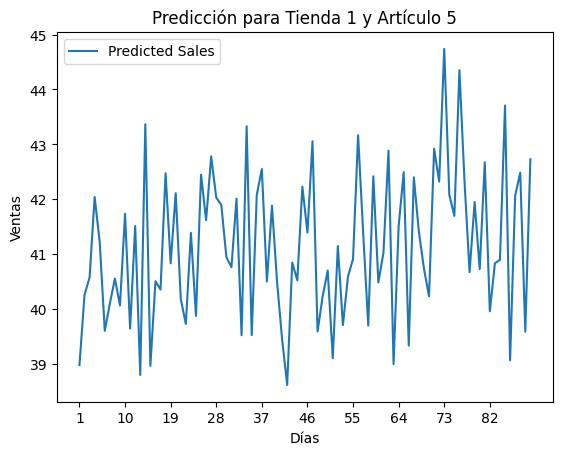

In [48]:
# Guardar las predicciones en un archivo CSV
forecast_results.to_csv('forecast_results.csv', index=False)

# Visualizar las predicciones para un artículo y una tienda específicos
store_id = 1  
item_id = 5  

# Filtrar las predicciones para la tienda y el artículo
specific_forecast = forecast_results[(forecast_results['store'] == store_id) & 
                                     (forecast_results['item'] == item_id)].drop(columns=['store', 'item'])

# Graficar las predicciones
import matplotlib.pyplot as plt

# Graficar las predicciones
plt.plot(specific_forecast.T, label='Predicted Sales')

num_days = specific_forecast.shape[1]
plt.xticks(ticks=range(0, num_days, 9), labels=range(1, num_days+1, 9))

# Añadir título y etiquetas
plt.title(f'Predicción para Tienda {store_id} y Artículo {item_id}')
plt.xlabel('Días')
plt.ylabel('Ventas')
plt.legend()

# Mostrar el gráfico
plt.show()


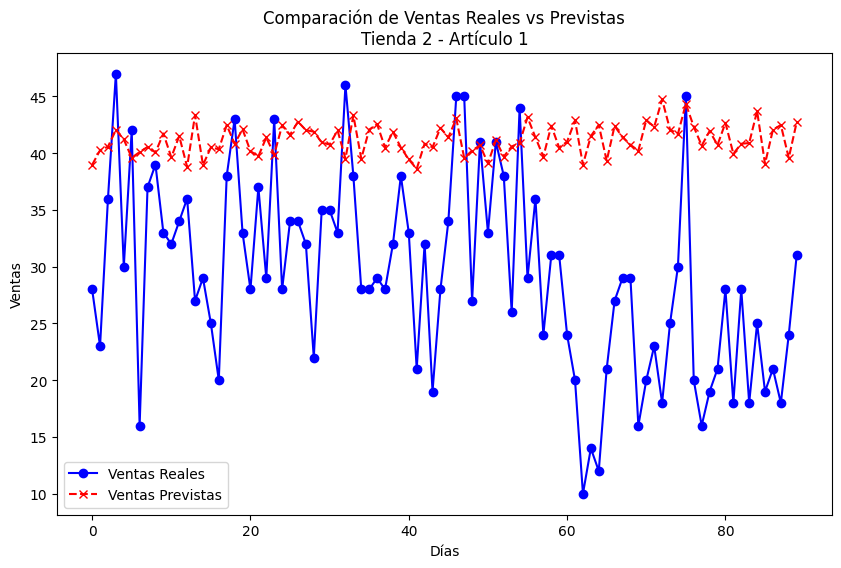

In [61]:
store_id = 2
item_id = 1

real_sales = dataTrain[(dataTrain['store'] == store_id) & (dataTrain['item'] == item_id)].tail(90)['sales'].values

# Tienes las predicciones ya escaladas inversamente a la escala original
predicted_sales = specific_forecast.values.flatten()

# Graficar las ventas reales vs las predicciones
plt.figure(figsize=(10, 6))
plt.plot(real_sales, label='Ventas Reales', color='blue', marker='o')
plt.plot(predicted_sales, label='Ventas Previstas', color='red', linestyle='--', marker='x')

# Añadir etiquetas y título
plt.title(f'Comparación de Ventas Reales vs Previstas\nTienda {store_id} - Artículo {item_id}')
plt.xlabel('Días')
plt.ylabel('Ventas')
plt.legend()

# Mostrar el gráfico
plt.show()


Shape of shap_values: (10, 30, 1, 90)
Shape of small_X_train_tensor[:10]: torch.Size([10, 30, 1])
Shape of shap_values_reduced: (10, 30)
Shape of X_flat: (10, 30)


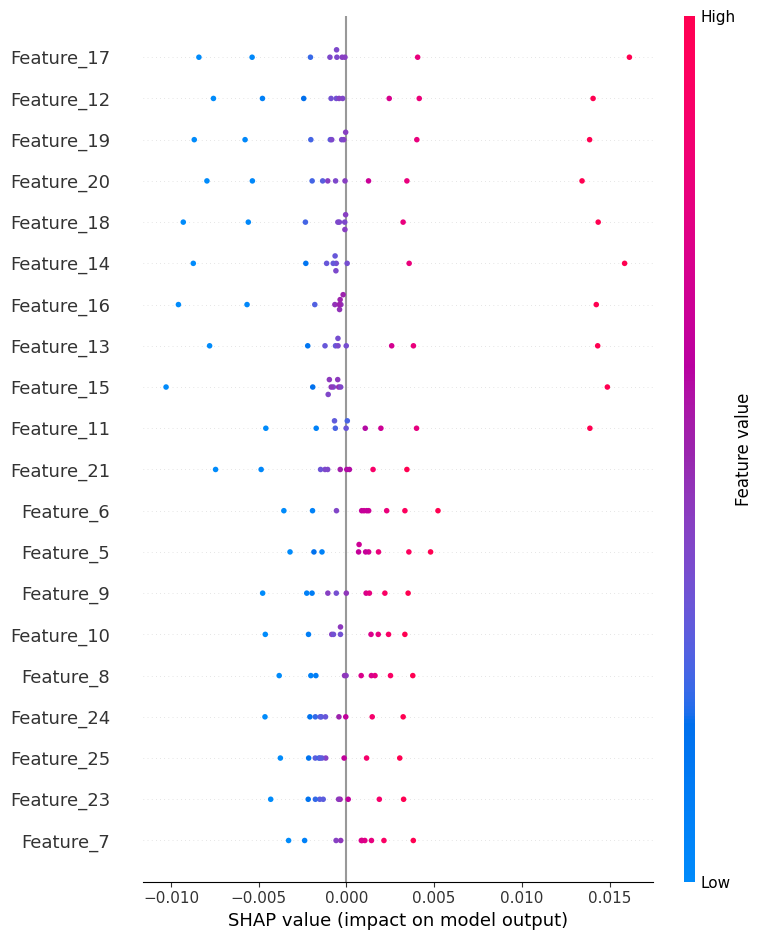

In [79]:
import shap

# Seleccionar un subconjunto más pequeño del conjunto de entrenamiento
small_X_train_tensor = X_train_tensor[:100]

# Usar GradientExplainer para explicar el modelo
explainer = shap.GradientExplainer(model, small_X_train_tensor)

# Calcular los valores SHAP para las primeras 10 secuencias
shap_values = explainer.shap_values(small_X_train_tensor[:10])

# Si shap_values es una lista, tomamos el primer elemento (asumiendo una tarea de clasificación binaria)
if isinstance(shap_values, list):
    shap_values = shap_values[0]

print("Shape of shap_values:", shap_values.shape)  # (10, 30, 1, 90)
print("Shape of small_X_train_tensor[:10]:", small_X_train_tensor[:10].shape)  # (10, 30, 1)

# Reducir la dimensionalidad de shap_values tomando el promedio sobre el último eje (los 90 pasos de tiempo)
shap_values_reduced = shap_values.mean(axis=-1).squeeze()
X_flat = small_X_train_tensor[:10].squeeze().numpy()

# Revisar las formas después de la reducción
print("Shape of shap_values_reduced:", shap_values_reduced.shape)  # (10, 30)
print("Shape of X_flat:", X_flat.shape)  # (10, 30)

# Asegurarse de que las formas coincidan
assert shap_values_reduced.shape == X_flat.shape, "Las formas de shap_values_reduced y X_flat deben coincidir"

# Crear nombres de características
feature_names = [f"Feature_{i}" for i in range(X_flat.shape[1])]

# Visualizar el summary plot
shap.summary_plot(shap_values_reduced, X_flat, feature_names=feature_names)


## 💻 Task 2

**1. ¿Cuál es el problema del gradiente de fuga en las redes LSTM y cómo afecta la efectividad de LSTM para el pronóstico de series temporales**

El problema del gradiente de fuga en las redes LSTM ocurre cuando los gradientes se vuelven muy pequeños durante el backpropagation, lo que limita la capacidad de la red para aprender patrones a largo plazo en series temporales. Aunque las LSTM esten diseñadas para mitigar este problema con sus celdas de memoria aún puede afectar la efectividad del modelo en pronóstico de secuencias largar, reduciendo su capacidad de capturar dependencias temporales profundas.

**2. ¿Cómo se aborda la estacionalidad en los datos de series temporales cuando se utilizan LSTM para realizar pronósticos y qué papel juega la diferenciación en el proceso?**

Se aborda incorporando características que capturen patrones repetitivos, como incluir datos adicionales que reflejen la preiodicidad (mes o día de la semana) o aplicando transformaciones a los datos. La diferenciación juega un papel clave al eliminar la tendencia y estacionalidad de los datos estabilizando la serie temporal y facilitando que la LSTM enfoque su capacidad de aprendizaje en las fluctuaciones residuales, mejorando la presición del pronóstico.

**3. ¿Cuál es el concepto de "tamaño de ventana" en el pronóstico de series temporales con LSTM y cómo afecta la elección del tamaño de ventana a la capacidad del modelo para capturar patrones a corto y largo plazo?**

El concepto de "tamaño de ventana" se refiere a la cantidad de pasos temporales pasados que se utilizan como entrada para predecir los valores futuros. Elegir un tamaño de ventana adecuado es importante, ya que un tamaño pequeño permite capturar patrones a corto plazo, pero puede perder dependencias a largo plazo, mientras que una ventana grande permite al modelo aprender relaciones a largo alcance, pero puede introducir ruido o redundancia y aumentar la complejidad del entrenamiento.